#**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 # Important for image recognition
from google.colab.patches import cv2_imshow # To display the images
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3) # To maintain consistent data and avoid random value generation
from tensorflow import keras # Wrapper for Deep Learning libraries
from keras.datasets import mnist # It is a dataset for begginers
from tensorflow.math import confusion_matrix

#**Loading MNIST dataset**

Data after loading into mnist will be in form mention in the code below as X_train , Y_train & X_test , Y_test

In [2]:
(X_train , Y_train) , (X_test , Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train) #Type of dataset

numpy.ndarray

In [4]:
print(X_train.shape , Y_train.shape , X_test.shape , Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


**Shape Signifies -->**6000 shows the total number of images in the data. 28 and 28 determines the dimension of the each image. All this is stored in Y_train 60000,

#**Printing the images**

In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


#**Displaying the Image**

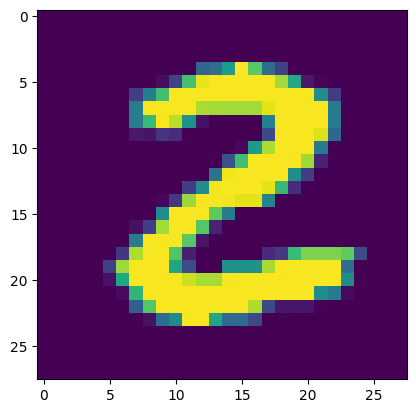

2


In [7]:
plt.imshow(X_train[25])
plt.show()

#print the corresponding label
print(Y_train[25])

#**Image Labels**

## Total Number of Images

In [8]:
print(Y_train.shape , Y_test.shape)

(60000,) (10000,)


## Unique Values

In [9]:
print(np.unique(Y_train) , np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

No need to resize the images as all the images have same dimensions. If not we need to resize all these images to a common dimension.

# **Scaling The Images or Normalisation**

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train , X_test)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] [[[0. 0. 0

In [12]:
print(np.unique(X_train) , np.unique(X_test))

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

**Note =** This step is done to put all the values in the range of **0 and 1**

#**Building A Neural Networks**

### Setting up the Layers

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'), # 50 neurons
    keras.layers.Dense(50, activation = 'relu'), # 50 neurons
    keras.layers.Dense(10, activation = 'sigmoid') # 10 neurons
])

## Compiling the Neural Networks

In [14]:
model.compile(optimizer = 'adam' ,
              loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy'])

#**Training the Model**

In [15]:
model.fit(X_train , Y_train , epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3055 - accuracy: 0.9113
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1415 - accuracy: 0.9579
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1054 - accuracy: 0.9682
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9742
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0705 - accuracy: 0.9784
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0596 - accuracy: 0.9811
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0529 - accuracy: 0.9827
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9859
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0398 - accuracy: 0.9869
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.034

Training Data Accuracy = 99.38%

## Accuracy on Test Data

In [16]:
loss , accuracy = model.evaluate(X_test , Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1382 - accuracy: 0.9726


Test Data Accuracy = 97.45%

# **Predictions**

In [17]:
Y_pred = model.predict(X_test)
print(Y_pred[0])

313/313 [==============================] - 1s 2ms/step
[5.1177409e-03 6.2337110e-04 3.5708815e-02 9.0103787e-01 3.0717885e-07
 2.7112337e-04 1.8474843e-11 1.0000000e+00 2.8029596e-04 9.5803916e-01]


## Converting the probabilities into class labels

In [18]:
labels = [np.argmax(i) for i in Y_pred]
print(labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

#**Confusion Matrix**

In [19]:
confusion_matrix = confusion_matrix(Y_test , labels)

In [20]:
print(confusion_matrix)

tf.Tensor(
[[ 976    0    0    0    0    0    2    1    1    0]
 [   2 1119    1    1    0    2    2    2    6    0]
 [   5    2  994    6    3    0    3    4   15    0]
 [   4    1    4  970    0    8    1   10    5    7]
 [   1    0    1    1  958    2    7    3    2    7]
 [   2    0    0   18    0  860    3    3    3    3]
 [   8    2    1    0    3    9  935    0    0    0]
 [   0    4   12    5    0    0    0 1000    3    4]
 [  12    2    3    6    3   14    1    6  922    5]
 [   2    2    0    3    8    7    1    7    1  978]], shape=(10, 10), dtype=int32)


## Build a Heatmap

Text(0.5, 47.7222222222222, 'Predicted Labels')

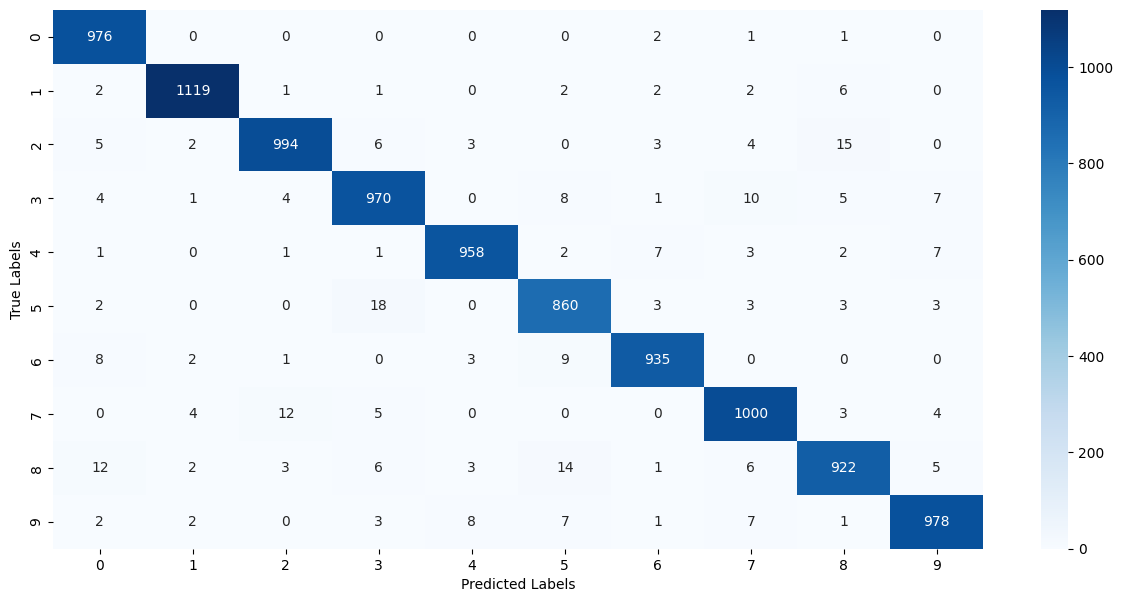

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues') #fmt as d as all values are integers
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

All the values in the diagonals represent the two labels are predicted by the model. The value means so 969 images are correctely predicted.

#**Build a Predictive System**

In [22]:
input_image_path = '/content/download.png'
input_image = cv2.imread(input_image_path) # Converts this image into Numpy arrays


In [23]:
type(input_image)

numpy.ndarray

In [24]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


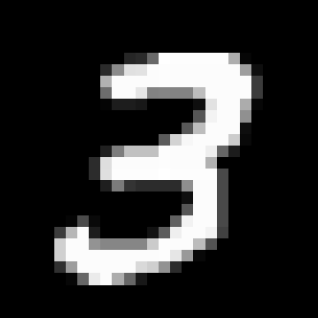

In [25]:
# To display the input data
cv2_imshow(input_image)

In [26]:
input_image.shape

(318, 318, 3)

# **Converting Input data into greyscale**

In [27]:
grayscale = cv2.cvtColor(input_image , cv2.COLOR_RGB2GRAY)

In [28]:
grayscale.shape

(318, 318)

# **Changing the Dimension of input data**

In [29]:
input_image = cv2.resize(grayscale, (28,28))

In [30]:
input_image.shape

(28, 28)

In [31]:
cv2_imshow(input_image)

# **Scaling the Input Data**

In [32]:
input_image = input_image/255

In [33]:
input_image = np.reshape(input_image , [1,28,28])

In [34]:
input_prediction = model.predict(input_image)
print(input_prediction)

1/1 [==============================] - 0s 20ms/step
[[1.1447668e-14 2.8316073e-05 5.0791034e-09 1.0000000e+00 3.8714002e-12
  1.0615653e-02 1.3101423e-19 1.6483048e-03 2.4664990e-04 4.6443847e-01]]


In [35]:
input_label = np.argmax(input_prediction)
print(input_label)

3


#**Predictive System**

Path of the image to be predicted: /content/download.png


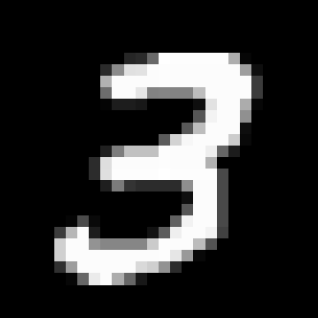

1/1 [==============================] - 0s 21ms/step
The Handwritten Digit is recognised as  3


In [36]:
# Input Image
input_image_path = input('Path of the image to be predicted: ')

# Converting the Input Image into array
input_image = cv2.imread(input_image_path)

# Printing the Input Image
cv2_imshow(input_image)

# Converting RGB image into Grayscale Image as we trained the model for Grayscale Images
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

# Changing the Dimension of Image as we trained our model for dimanesions 28,28
input_image_resize = cv2.resize(grayscale, (28, 28))

# Scaling the image to get all values between 0 and 1
input_image_resize = input_image_resize/255

# Reshaping the image to get accurate labels
image_reshaped = np.reshape(input_image_resize, [1,28,28])

# Getting probabilities in the Predictions as it is a Neural Network
input_prediction = model.predict(image_reshaped)

# Converting the probabilities into label by using argmax to find the index value at maximum value
input_pred_label = np.argmax(input_prediction)

# Printing the Label of the Image
print('The Handwritten Digit is recognised as ', input_pred_label)